In [1]:
# def hat_f( x , Theta ):
#     a=1/(1+exp ( −( Theta [ 1 ] * x[0] + Theta[2]* x [1] + Theta [ 3 ] ) ) )
#     b=1/(1+exp ( −( Theta [ 4 ]* x[0] + Theta [ 5 ]* x[1] + Theta [ 6 ] ) ) )
#     c =1/(1+exp ( −( Theta [ 7 ]*x [ 1 ] + Theta [ 8 ]*x [ 2 ] + Theta [ 9 ] ) ) )
#     d=1/(1+exp ( −( Theta [ 1 0 ]* a+Theta [ 1 1 ]* b+Theta [ 1 2 ]* c+Theta [ 1 3 ] ) ) )
#     e =1/(1+exp ( −( Theta [ 1 4 ]*a+Theta [ 1 5 ]* b+Theta [ 1 6 ]*c+Theta [ 1 7 ] ) ) )
#     hat_y=tanh ( Theta [ 1 8 ]*d+Theta [ 1 9 ]*e+Theta [ 2 0 ] )
#     return hat_y
# end


In [2]:
import numpy as np
np.random.seed(22)

# Initalisieren der Samples
n = 200
samples = np.array([np.array([np.random.uniform(-6, 6), np.random.uniform(-6, 6)]) for i in range(n)])

# Initialisieren der Parameter
n_params = 21
Theta = list(np.zeros(n_params))
Theta[1]=0.12 
Theta[2]=1.6 
Theta[3]=3.2 
Theta[4]=1.5
Theta[5]=-1.1 
Theta[6]=3.2 
Theta[7]=1.4 
Theta[8]=0.54 
Theta[9]=-3.3 
Theta[10]=3.8 
Theta[11]=2.6
Theta[12]=-4.5
Theta[13]=-3.4
Theta[14]=-2.0
Theta[15]=-3.3
Theta[16]=1.7
Theta[17]=3.2
Theta[18]=7.2
Theta[19]=-6.0
Theta[20]=-1.8

W_layer1 = np.array([[Theta[1], Theta[4], Theta[7]], # x1
                     [Theta[2], Theta[5], Theta[8]]]) # x2

W_layer2 = np.array([[Theta[10], Theta[14]], # a
                     [Theta[11], Theta[15]], # b
                     [Theta[12], Theta[16]]]) # c

W_layer3 = np.array([[Theta[18]], # d
                     [Theta[19]]]) # e

bias_1 = np.array([Theta[3], Theta[6], Theta[9]])
bias_2 = np.array([Theta[13], Theta[17]])
bias_3 = np.array([Theta[20]])

In [3]:
import lasagne
import theano
import theano.tensor as T
from lasagne.nonlinearities import sigmoid, tanh

x = T.matrix('x')

input_layer = lasagne.layers.InputLayer((1, 2), input_var=x) 
hidden_1 = lasagne.layers.DenseLayer(input_layer, num_units=W_layer1.shape[1], W=W_layer1, b=bias_1, nonlinearity=sigmoid)
hidden_2 = lasagne.layers.DenseLayer(hidden_1, num_units=W_layer2.shape[1], W=W_layer2, b=bias_2, nonlinearity=sigmoid)
output_layer =lasagne.layers.DenseLayer(hidden_2, num_units=W_layer3.shape[1], W=W_layer3, b=bias_3, nonlinearity=tanh)

# symbolic output of the network
network_output = lasagne.layers.get_output(output_layer, x)
# compile Theano function
compute_output = theano.function([x], network_output)

# Perform forward step
output_result = compute_output(samples)

positives = output_result > 0
positives = positives[:,0]

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\jonas\anaconda3\envs\ginn_p1\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


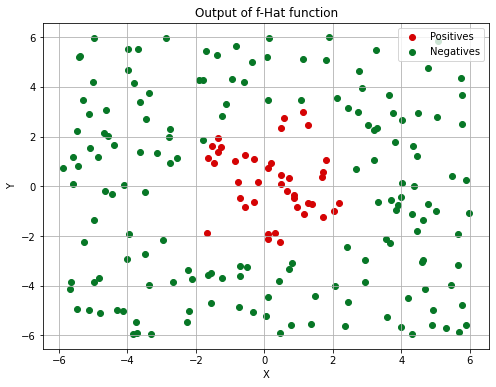

In [4]:
import matplotlib.pyplot as plt

x_values = samples[:, 0]
y_values = samples[:, 1]

# Plot the samples in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values[positives], y_values[positives], color='#d50304', label='Positives')
plt.scatter(x_values[~positives], y_values[~positives], color='#077726', label='Negatives')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Output of f-Hat function')
plt.legend()
plt.grid(True)
plt.show()